In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BT CUOI KI/Train', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 465 images belonging to 8 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT CUOI KI/Test', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 465 images belonging to 8 classes.


In [ ]:
training_set.class_indices

{'Dan Tranh': 0,
 'Dan bau': 1,
 'Sáo trúc': 2,
 'Đàn Nhị': 3,
 'Đàn nguyệt': 4,
 'Đàn tam thập lục': 5,
 'Đàn tì bà': 6,
 'Đàn Đáy': 7}

In [ ]:
val_set.class_indices

{'Dan Tranh': 0,
 'Dan bau': 1,
 'Sáo trúc': 2,
 'Đàn Nhị': 3,
 'Đàn nguyệt': 4,
 'Đàn tam thập lục': 5,
 'Đàn tì bà': 6,
 'Đàn Đáy': 7}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

15/15 [==============================] - 11s 729ms/step - loss: 0.4945 - accuracy: 0.8430 - val_loss: 0.1899 - val_accuracy: 0.9527
Epoch 39/100
15/15 [==============================] - 11s 735ms/step - loss: 0.5014 - accuracy: 0.8301 - val_loss: 0.2045 - val_accuracy: 0.9419
Epoch 40/100
15/15 [==============================] - 11s 742ms/step - loss: 0.4571 - accuracy: 0.8516 - val_loss: 0.1728 - val_accuracy: 0.9720
Epoch 41/100
15/15 [==============================] - 11s 756ms/step - loss: 0.3584 - accuracy: 0.8839 - val_loss: 0.1331 - val_accuracy: 0.9656
Epoch 42/100
15/15 [==============================] - 12s 822ms/step - loss: 0.4259 - accuracy: 0.8559 - val_loss: 0.1481 - val_accuracy: 0.9677
Epoch 43/100
15/15 [==============================] - 11s 729ms/step - loss: 0.3641 - accuracy: 0.8817 - val_loss: 0.1497 - val_accuracy: 0.9548
Epoch 44/100
15/15 [==============================] - 11s 721ms/step - loss: 0.4251 - accuracy: 0.8688 - val_loss: 0.1654 - val_accuracy: 0.961

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.05904046446084976
Train Accuracy 0.9870967864990234


<function matplotlib.pyplot.show(*args, **kw)>

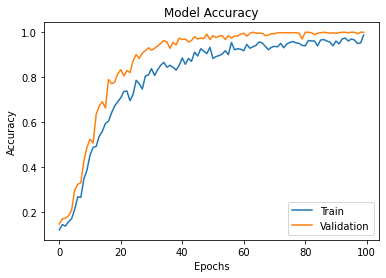

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("nhaccu.h5")

In [ ]:
model_food=load_model('nhaccu.h5')

1/1 [==============================] - 0s 79ms/step
Đây là : Dan Tranh


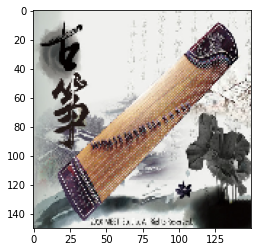

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/BT CUOI KI/Test/Dan Tranh/1.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_nhaccu=['Dan Tranh','Dan bau','Sáo trúc','Đàn Nhị','Đàn nguyệt','Đàn tam thập lục','Đàn tì bà','Đàn Đáy']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_nhaccu[a])